## Forcasting Procedure

- <font color = blue> <b> Choose a Model.
- <font color = blue> Split Data into Train and Test Data.
- <font color = blue> Fit Model on the training Data
- <font color = blue> Evaluate Model on the Test Data.
- <font color = blue>  Re-fit Model on the Entire Data.
- <font color = blue>  Forecast for the Future Data.

In [1]:
import numpy as np
import pandas as pd

In [19]:
airline = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates= True)

In [24]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [23]:
airline.index.freq = 'MS'

In [25]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [26]:
airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


### Train Test Split

- <font color = blue> Train and test split is done on the basis of time frame in TS data. Most recent data set is taken as Test data and the Data with earlier time stamp is taken as Train Data.

- The model is fit  on the Train data and the prediction will be done on the time frame of the Test data and the result of the Prediction were than comapre with the actual results of the Test Data.


In [27]:
train_data =  airline.iloc[:109]
test_data = airline.iloc[108:]

In [30]:
train_data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [31]:
test_data.head()

,Thousands of Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363


## Fitting the Model On the Train Data

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [38]:
fitted_model = ExponentialSmoothing(train_data["Thousands of Passengers"], 
                                    trend='mul', seasonal='mul', seasonal_periods=12).fit()

### Testing the Model and Predicting for Test Data

In [39]:
#Forecast will take the no of periods we need to predict as argument
#no periods are in months, so if we need to predict for 3 years, we need to give input as 36 months.

test_prediction = fitted_model.forecast(36)   



In [40]:
test_prediction

1958-02-01    339.142839
1958-03-01    399.281567
1958-04-01    394.233518
1958-05-01    402.545212
1958-06-01    473.128729
1958-07-01    521.795258
1958-08-01    514.513564
1958-09-01    446.216722
1958-10-01    385.430842
1958-11-01    339.645012
1958-12-01    381.455551
1959-01-01    401.210071
1959-02-01    387.159060
1959-03-01    455.812296
1959-04-01    450.049538
1959-05-01    459.538011
1959-06-01    540.114821
1959-07-01    595.671611
1959-08-01    587.358966
1959-09-01    509.392582
1959-10-01    440.000570
1959-11-01    387.732331
1959-12-01    435.462452
1960-01-01    458.013840
1960-02-01    441.973470
1960-03-01    520.346708
1960-04-01    513.768052
1960-05-01    524.599914
1960-06-01    616.584878
1960-07-01    680.007460
1960-08-01    670.517902
1960-09-01    581.512951
1960-10-01    502.296340
1960-11-01    442.627906
1960-12-01    497.115710
1961-01-01    522.859949
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

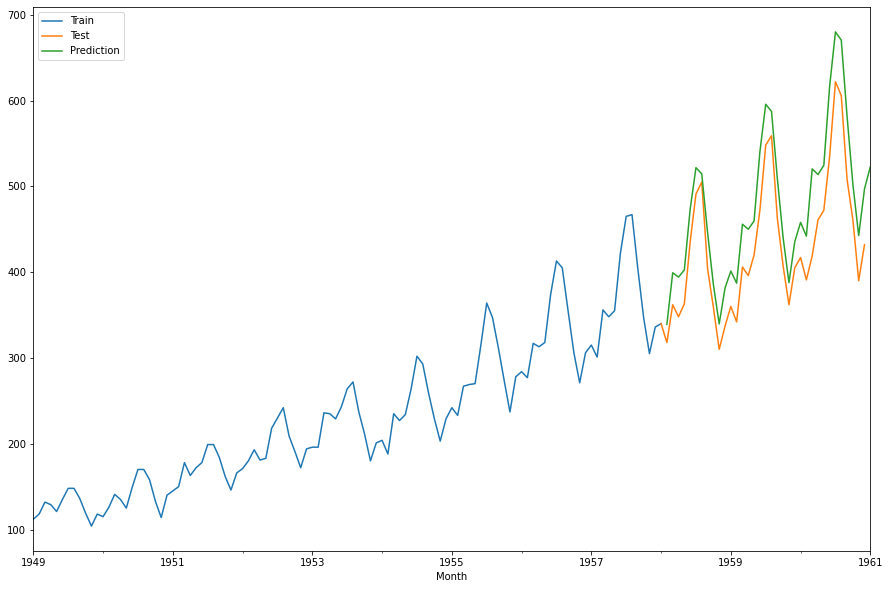

In [41]:
# Plot the PRedicted and actual 

train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(15,10))
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_prediction.plot(legend=True, label='Prediction')

<AxesSubplot:xlabel='Month'>

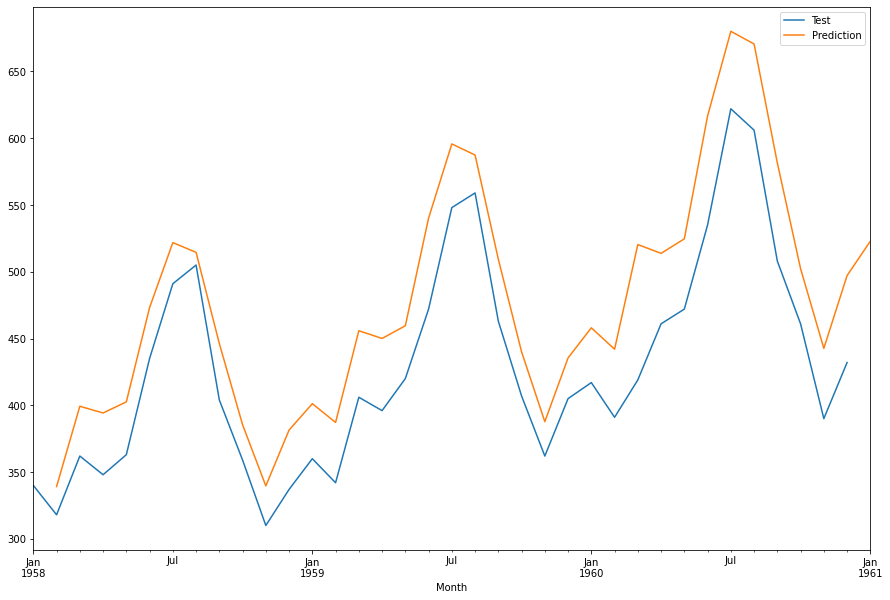

In [17]:
test_data['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(15,10))
test_prediction.plot(legend=True, label='Prediction', xlim=['1958-01-01','1961-01-01'])

### Evaluating The Prediction

- <font color = blue> <b> Mean Absolute Error
- <font color = blue> <b> Mean Squared Error
- <font color = blue> <b> Root Mean Squared Error

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
test_data.mean()

Thousands of Passengers    428.5
dtype: float64

In [22]:
test_data.std()

Thousands of Passengers    79.329152
dtype: float64

In [23]:
mean_absolute_error(test_data, test_prediction)

63.031111382769595

In [24]:
mean_squared_error(test_data,test_prediction)

5614.2515044341835

In [25]:
# RMSE

np.sqrt(mean_squared_error(test_data,test_prediction))

74.92830909899264

### Forcast The Future Values

In [26]:
final_model = ExponentialSmoothing(airline["Thousands of Passengers"], 
                                    trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [29]:
final_prediction = final_model.forecast(36)

In [30]:
final_prediction

1961-01-01    450.675302
1961-02-01    424.818510
1961-03-01    475.494744
1961-04-01    504.076271
1961-05-01    517.871918
1961-06-01    590.145478
1961-07-01    684.227074
1961-08-01    678.030847
1961-09-01    567.111774
1961-10-01    507.823777
1961-11-01    434.718565
1961-12-01    485.979996
1962-01-01    502.745789
1962-02-01    473.901535
1962-03-01    530.432840
1962-04-01    562.316643
1962-05-01    577.706222
1962-06-01    658.330184
1962-07-01    763.281855
1962-08-01    756.369723
1962-09-01    632.635192
1962-10-01    566.497131
1962-11-01    484.945430
1962-12-01    542.129545
1963-01-01    560.832438
1963-02-01    528.655553
1963-03-01    591.718418
1963-04-01    627.286037
1963-05-01    644.453711
1963-06-01    734.392868
1963-07-01    851.470530
1963-08-01    843.759780
1963-09-01    705.729109
1963-10-01    631.949534
1963-11-01    540.975447
1963-12-01    604.766547
Freq: MS, dtype: float64

In [31]:
# Ploting the forcast vs Given Data

<AxesSubplot:xlabel='Month'>

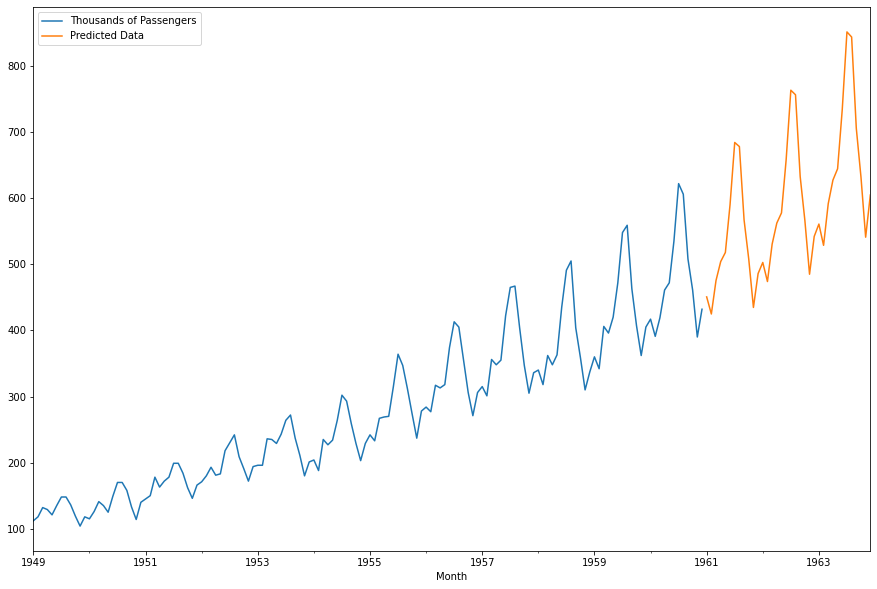

In [53]:
airline.plot(legend=True, label='Actual Data',figsize=(15,10))
final_prediction.plot(legend=True, label='Predicted Data', figsize=(15,10))

### Staionarity

<font color = blue> Data is called as staionary, if it does not exhibit trend  and Seasonality in the data

In [34]:
df = pd.read_csv("Data/samples.csv", index_col='Unnamed: 0', parse_dates=True)
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<AxesSubplot:>

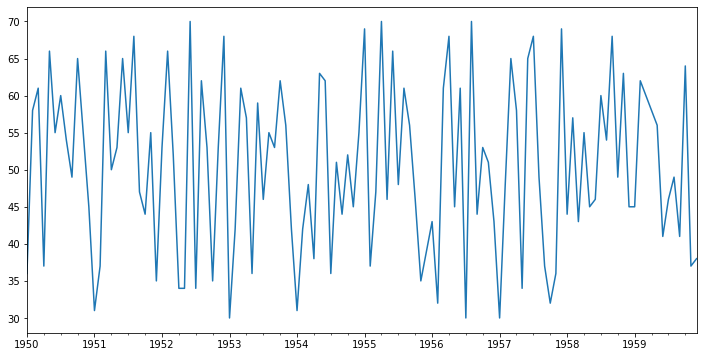

In [35]:
# Stationary Data

df['a'].plot(figsize=(12,6))

<AxesSubplot:>

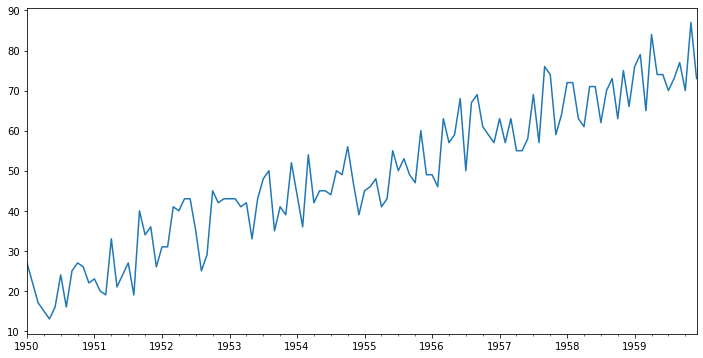

In [36]:
# Non Stationary Data
# Shows Trend

df['b'].plot(figsize=(12,6))

<font color = red> <b> Differenceing used to convert non stationary data into stationary data

In [37]:
from statsmodels.tsa.statespace.tools import diff

<AxesSubplot:>

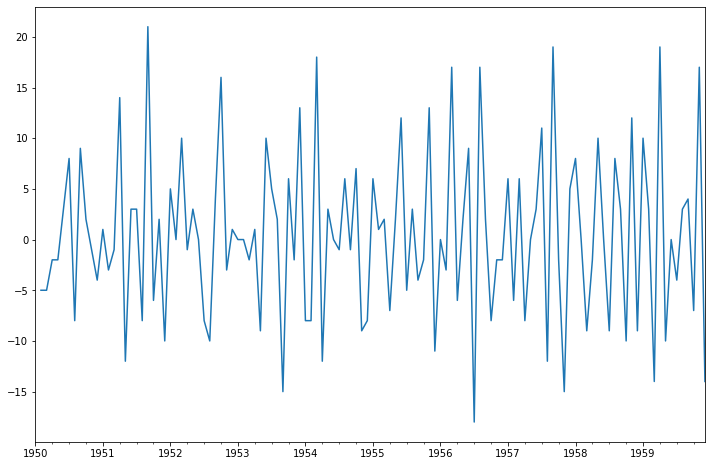

In [38]:
(df['b'] - df['b'].shift(1)).plot(figsize=(12,8))

<AxesSubplot:>

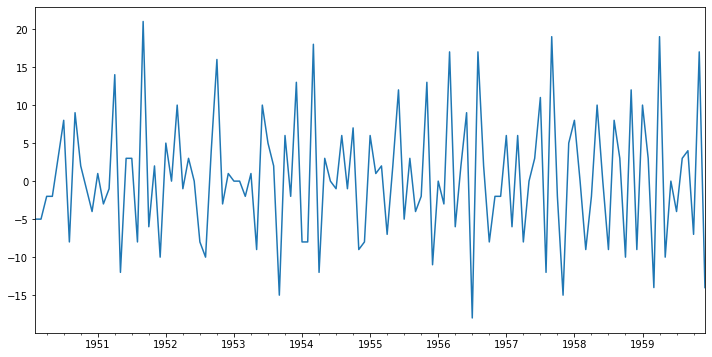

In [39]:
# Using Diff method

diff(df['b'],k_diff=1).plot(figsize=(12,6))